In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("Algerian_forest_fires_dataset.csv", header=1)

In [3]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [4]:
df.shape

(246, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [6]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [7]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [8]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.loc[:122, "Region"] = 1
df.loc[122:, "Region"] = 2
df[["Region"]] = df[["Region"]].astype(int)

In [10]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1


In [11]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,2
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,2
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2
245,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,2


In [12]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [13]:
df = df.dropna().reset_index(drop=True)

In [14]:
df.shape

(244, 15)

In [15]:
df = df.drop(122).reset_index(drop=True)

In [16]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [17]:
df.columns = df.columns.str.strip()

In [18]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [19]:
df[["day", "month", "year", "Temperature", "RH", "Ws"]] = df[["day", "month", "year", "Temperature", "RH", "Ws"]].astype(int)

In [20]:
objects = [features for features in df.columns if df[features].dtypes == "O"]
for i in objects:
  if i != "Classes":
    df[i] = df[i].astype(float)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
day,243.0,15.761317,8.842552,1.0,8.00,16.0,23.00,31.0
month,243.0,7.502058,1.114793,6.0,7.00,8.0,8.00,9.0
year,243.0,2012.000000,0.000000,2012.0,2012.00,2012.0,2012.00,2012.0
Temperature,243.0,32.152263,3.628039,22.0,30.00,32.0,35.00,42.0
RH,243.0,62.041152,14.828160,21.0,52.50,63.0,73.50,90.0
Ws,243.0,15.493827,2.811385,6.0,14.00,15.0,17.00,29.0
Rain,243.0,0.762963,2.003207,0.0,0.00,0.0,0.50,16.8
FFMC,243.0,77.842387,14.349641,28.6,71.85,83.3,88.30,96.0
DMC,243.0,14.680658,12.393040,0.7,5.80,11.3,20.80,65.9
DC,243.0,49.430864,47.665606,6.9,12.35,33.1,69.10,220.4


In [23]:
df.Classes.value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [24]:
df.Classes = df.Classes.str.strip()

In [25]:
df.Classes.value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

In [26]:
df.to_csv("Algerian_forest_fire_dataset_CLEANED.csv", index=False)

In [27]:
df1 = df.drop(["day", "month", "year"], axis=1)

In [28]:
df1.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1


In [29]:
df1["Classes"] = np.where(df1["Classes"] == "not fire", 0, 1)

In [30]:
percentage = df1.Classes.value_counts(normalize=True) * 100
percentage

1    56.378601
0    43.621399
Name: Classes, dtype: float64

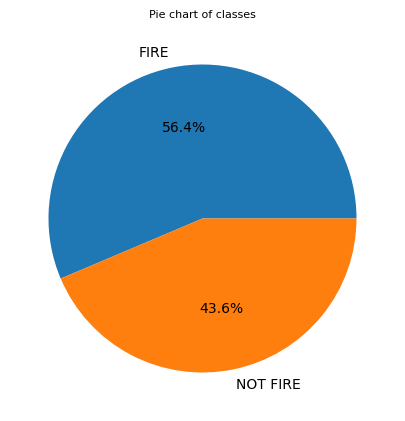

In [31]:
class_labels = ["FIRE", "NOT FIRE"]
plt.figure(figsize=(8, 5))
plt.pie(percentage, labels=class_labels, autopct="%1.1f%%")
plt.title("Pie chart of classes", fontsize=8)
plt.show()

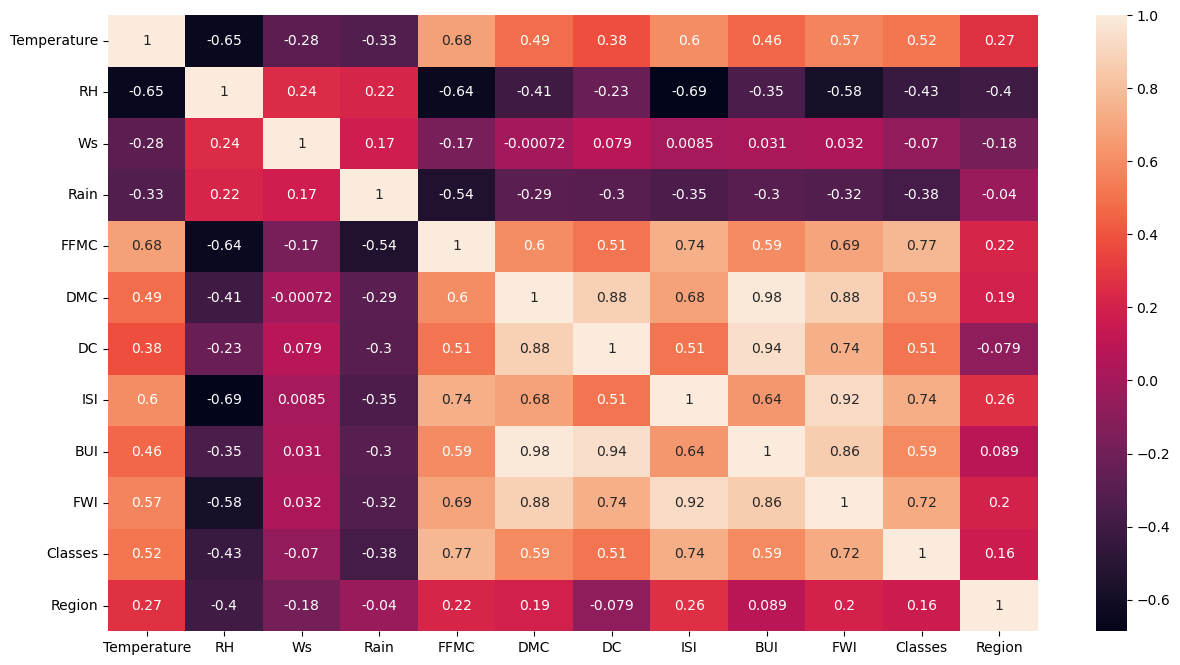

In [32]:
plt.figure(figsize=(15, 8))
sns.heatmap(df1.corr(), annot=True)
plt.show()

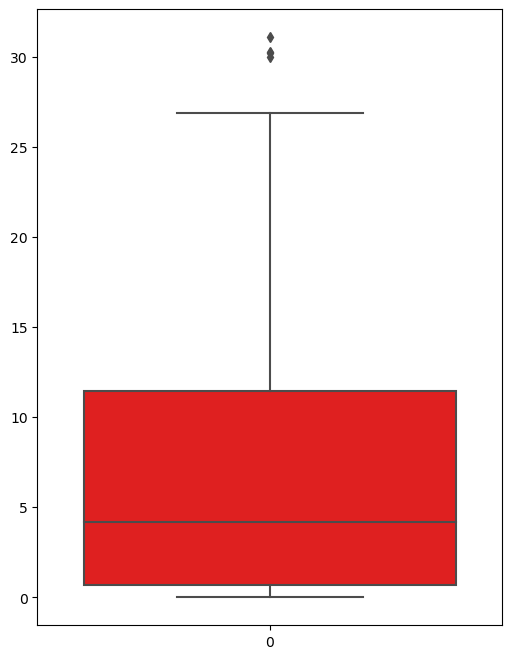

In [33]:
plt.figure(figsize=(6, 8))
boxplot = sns.boxplot(df1["FWI"], color="red", orient="v")
plt.show()

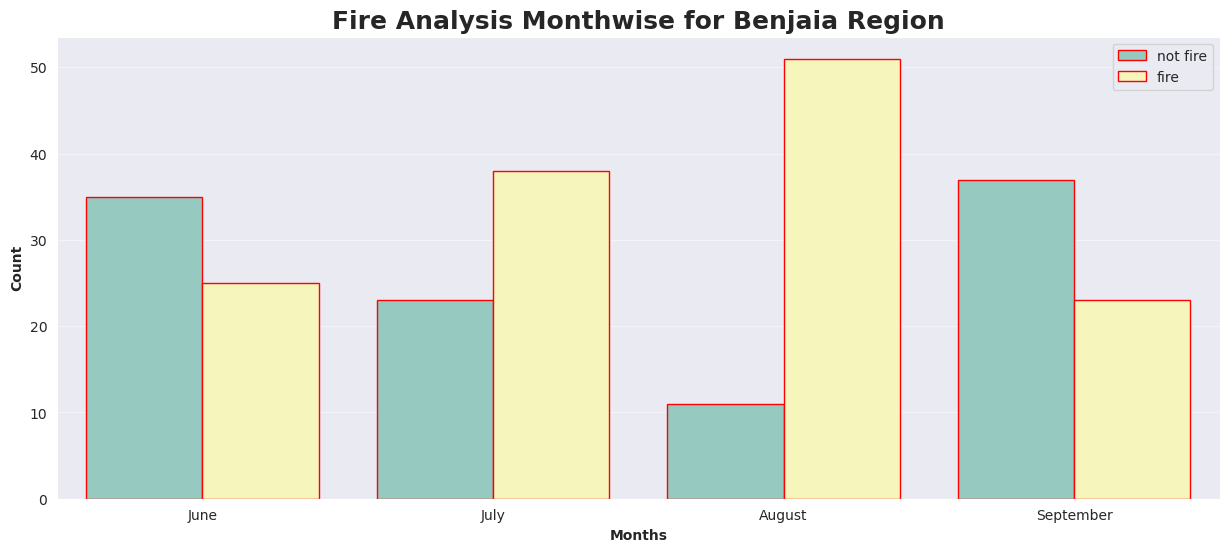

In [34]:
# monthwise fire analysis
bejaia_df = df.loc[df["Region"] == 1]
plt.figure(figsize=(15, 6))
sns.set_style("darkgrid")
sns.countplot(x="month", hue="Classes", data=df, ec="red", palette="Set3")
plt.title("Fire Analysis Monthwise for Benjaia Region", fontsize=18, weight="bold")
plt.ylabel("Count", weight="bold")
plt.xlabel("Months", weight="bold")
plt.legend(loc="upper right")
plt.xticks(np.arange(4), ["June", "July", "August", "September"])
plt.grid(alpha=0.5, axis="y")
plt.show()

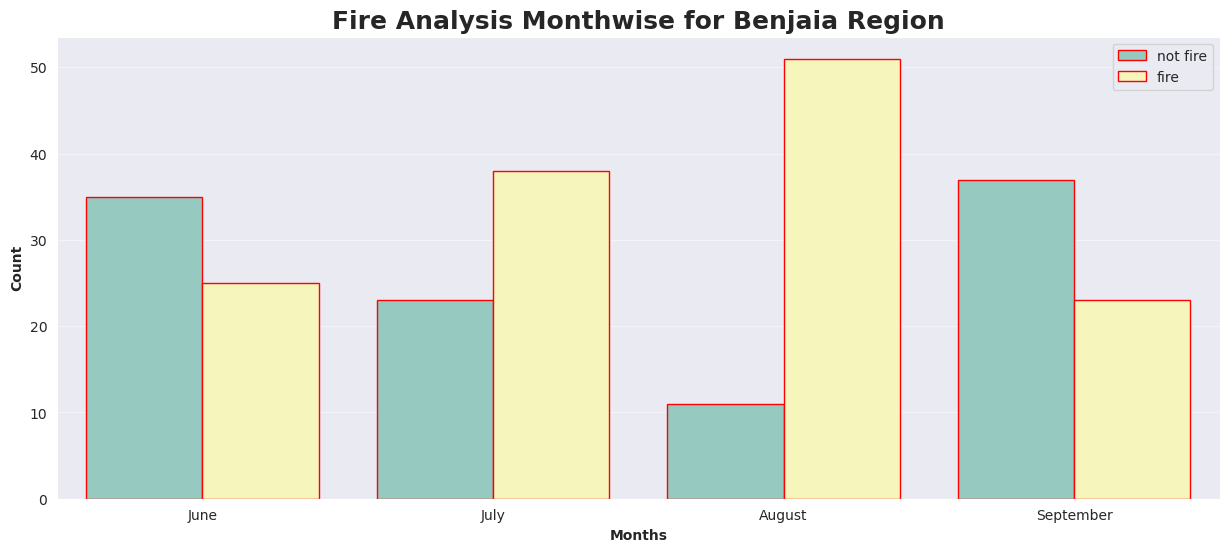

In [35]:
bejaia_df = df.loc[df["Region"] == 2]
plt.figure(figsize=(15, 6))
sns.set_style("darkgrid")
sns.countplot(x="month", hue="Classes", data=df, ec="red", palette="Set3")
plt.title("Fire Analysis Monthwise for Benjaia Region", fontsize=18, weight="bold")
plt.ylabel("Count", weight="bold")
plt.xlabel("Months", weight="bold")
plt.legend(loc="upper right")
plt.xticks(np.arange(4), ["June", "July", "August", "September"])
plt.grid(alpha=0.5, axis="y")
plt.show()

In [40]:
def barchart(feature, xlabel):
    plt.figure(figsize=[14, 8])
    by_feature = df1.groupby([feature], as_index=False)["Classes"].sum()
    ax = sns.barplot(x=feature, y="Classes", data=by_feature[[feature, "Classes"]], estimator=sum)
    ax.set(xlabel=xlabel, ylabel="fire_count")

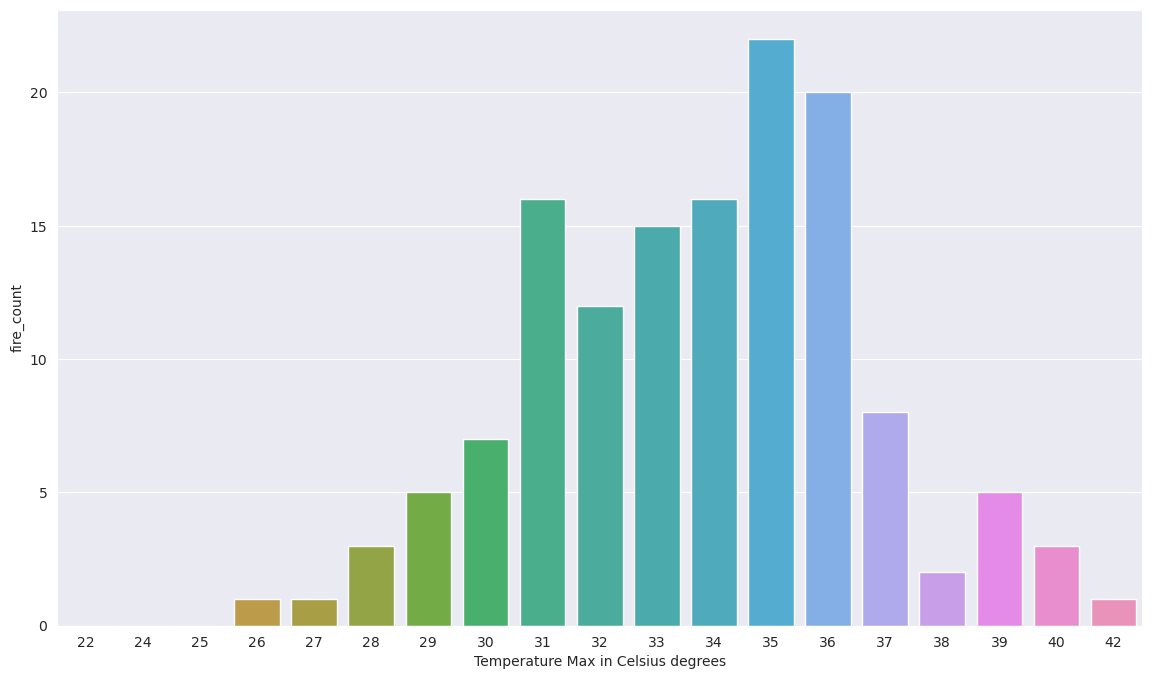

In [41]:
barchart('Temperature','Temperature Max in Celsius degrees')

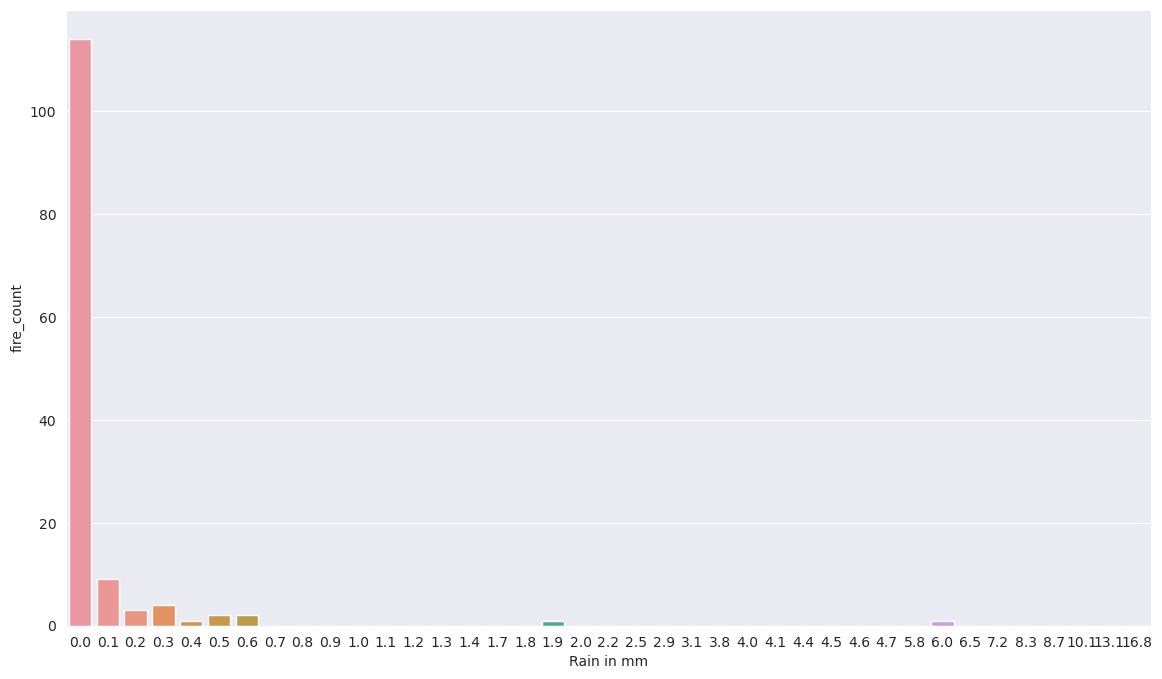

In [42]:
barchart("Rain", "Rain in mm")

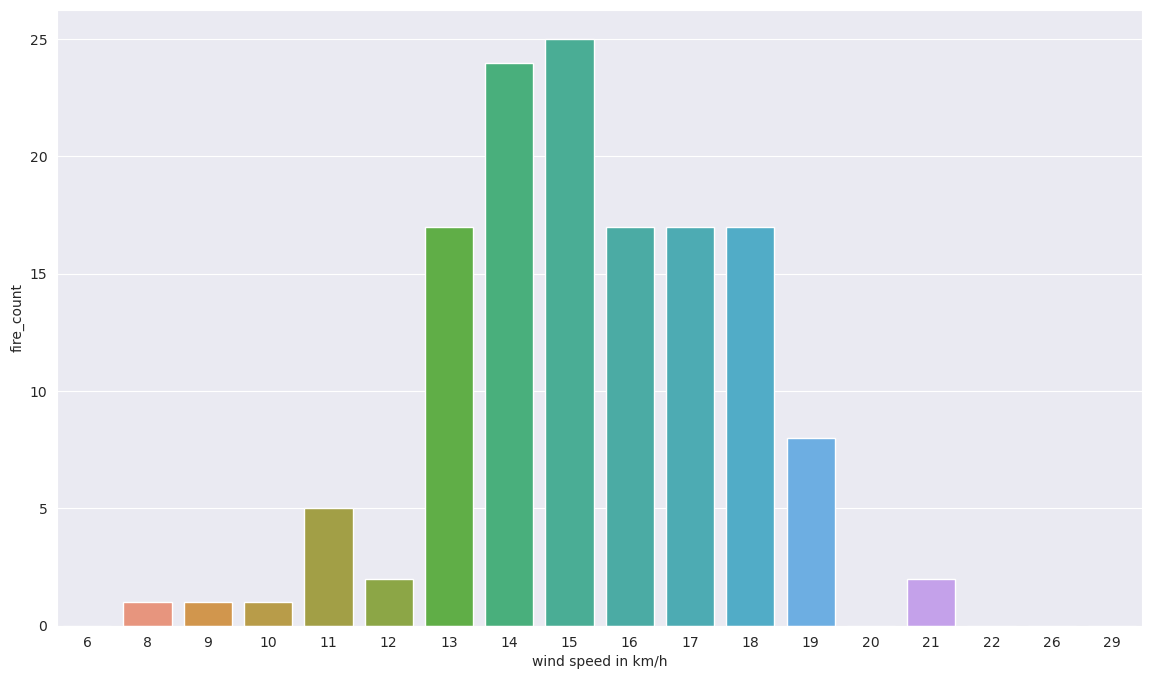

In [43]:
barchart("Ws", "wind speed in km/h")

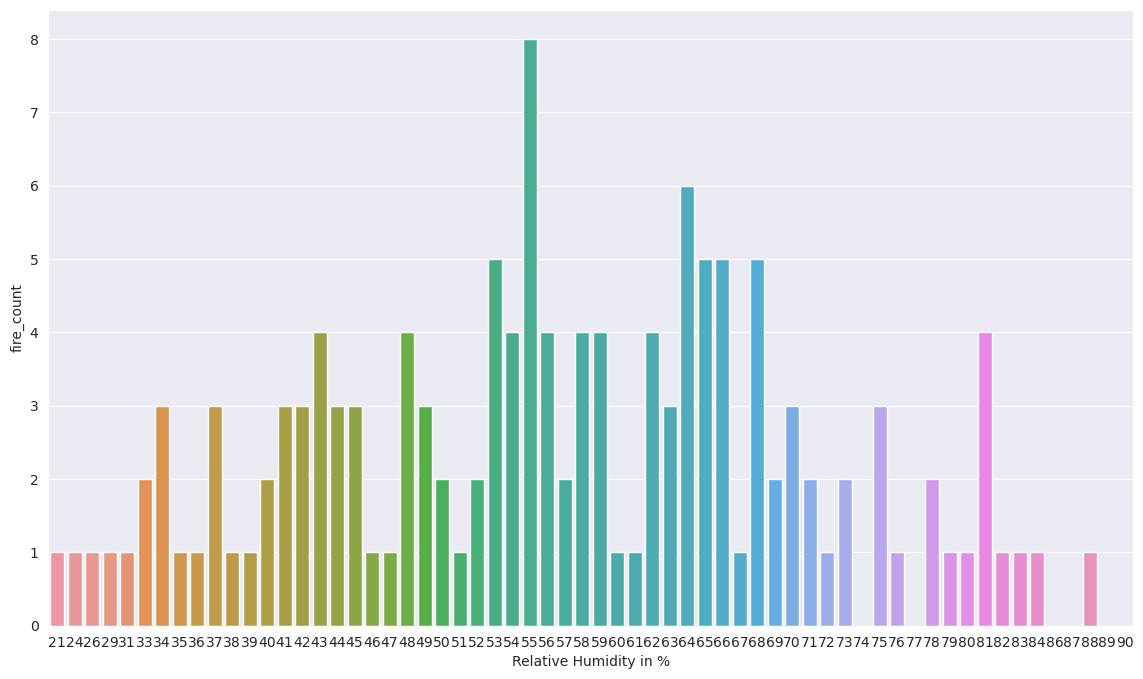

In [54]:
barchart("RH", "Relative Humidity in %")

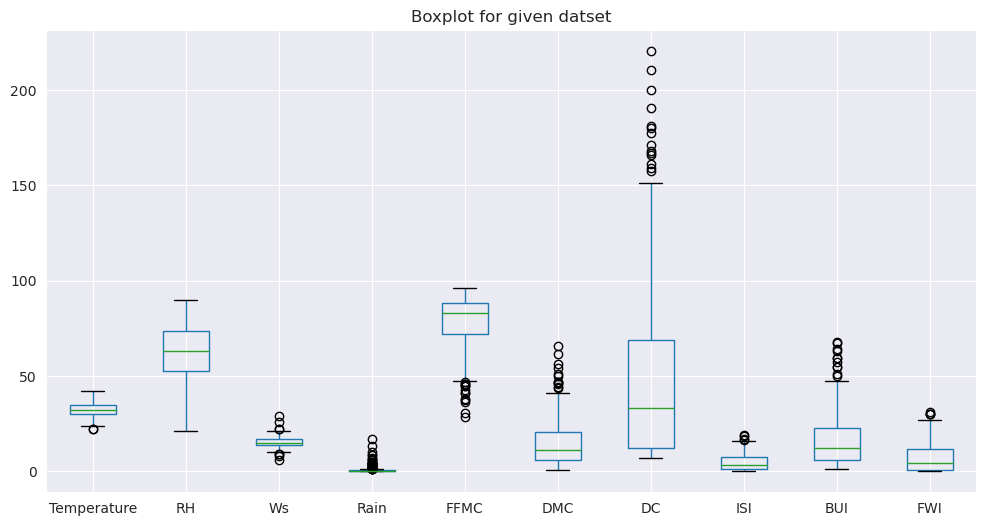

In [56]:
df_data = df1.drop(["Classes", "Region"], axis=1)
fig = plt.figure(figsize=(12, 6))
ax = df_data.boxplot()
ax.set_title("Boxplot for given datset")
plt.show()

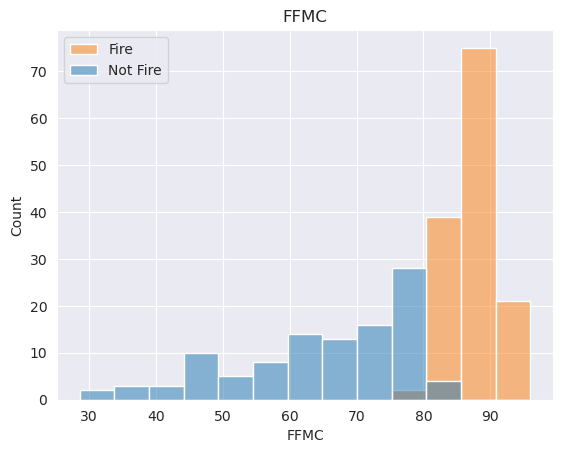

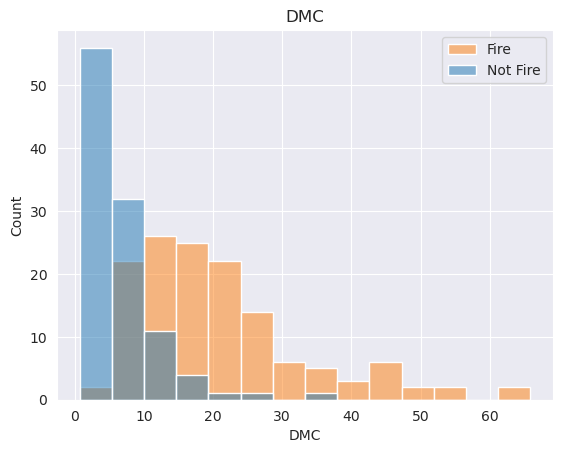

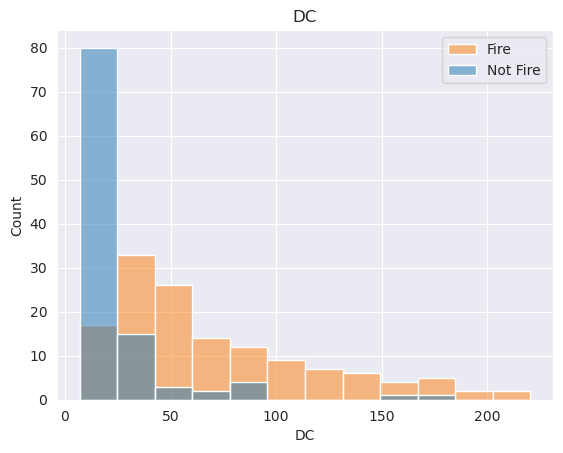

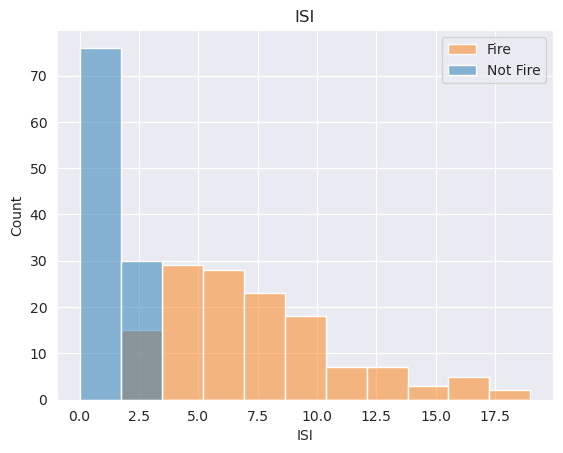

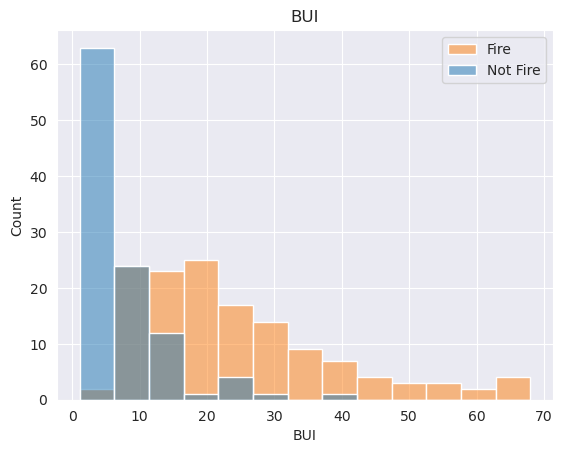

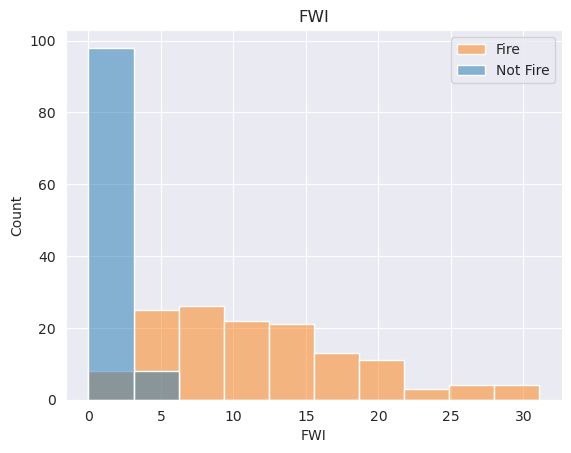

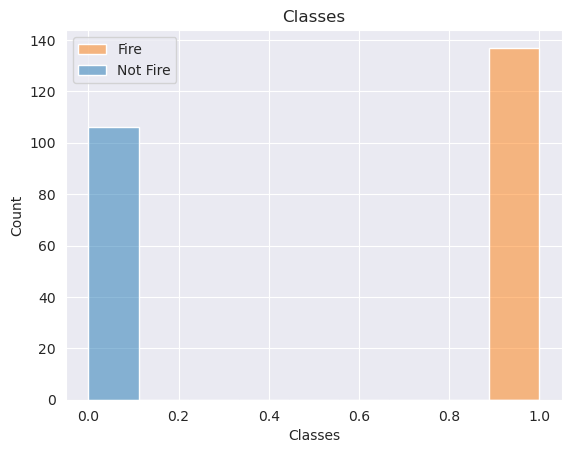

In [57]:
selected_feature = df1.drop(["Region", "Temperature", "Rain", "Ws", "RH"], axis=1)
for feature in selected_feature:
    sns.histplot(data=selected_feature, x=feature, hue="Classes")
    plt.legend(labels=['Fire','Not Fire'])
    plt.title(feature)
    plt.show()